# Stock Price Prediction Using Yahoo Finance

# Import necessary libraries

In [11]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Load Stock Data

In [12]:
# Fetch stock data
ticker = "AAPL"  # Change this to any stock symbol
start_date = "2015-01-01"
end_date = "2024-01-01"

stock = yf.download(ticker, start=start_date, end=end_date)
data = stock[['Close']].values  # Use only closing prices

[*********************100%***********************]  1 of 1 completed


# Step 2: Exploratory Data Analysis (EDA)

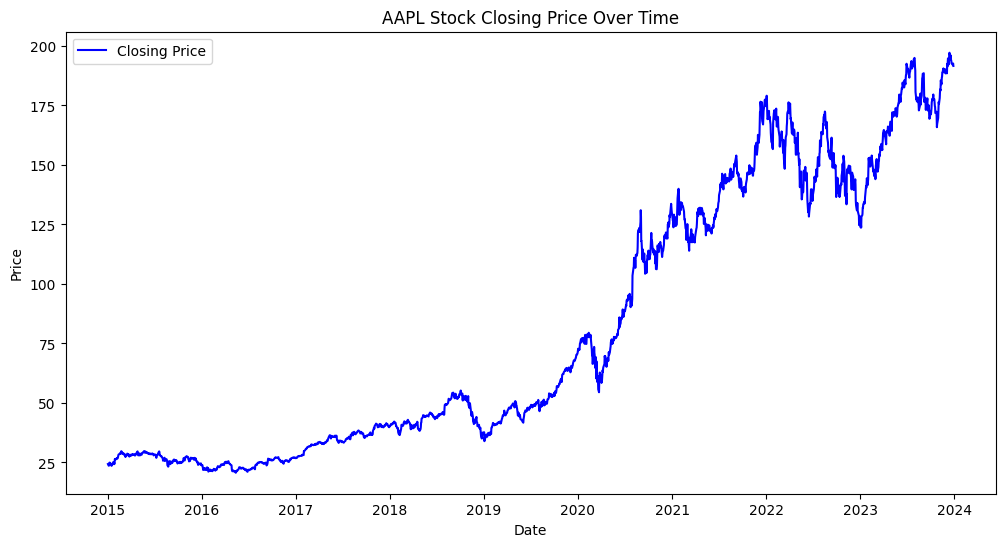

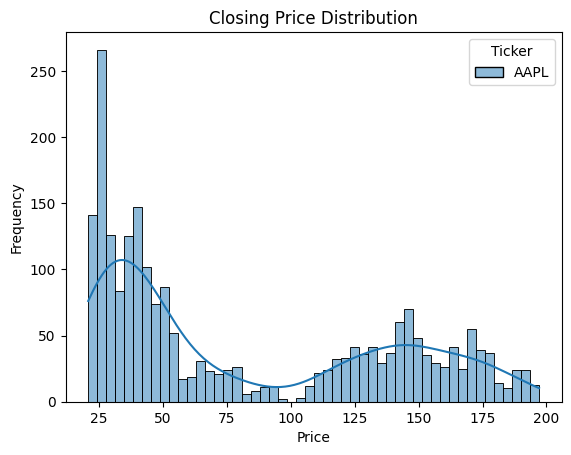

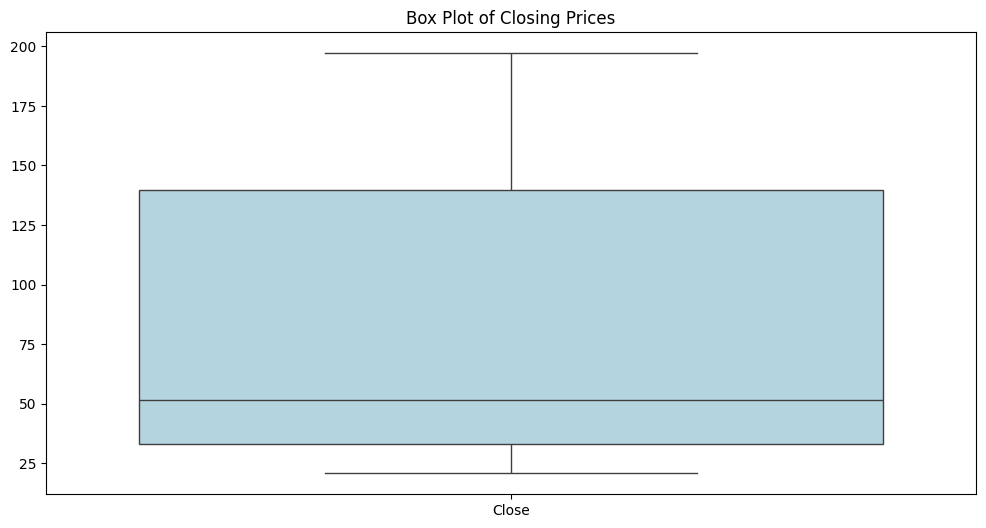

In [13]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
plt.plot(stock['Close'], label='Closing Price', color='blue')
plt.title(f'{ticker} Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

sns.histplot(stock['Close'], bins=50, kde=True, color='blue')
plt.title('Closing Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=stock[['Close']], color='lightblue')
plt.title('Box Plot of Closing Prices')
plt.show()

# Step 3: Data Preprocessing

In [14]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare input sequences
lookback = 60
X, y = [], []
for i in range(lookback, len(scaled_data)):
    X.append(scaled_data[i-lookback:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Build the LR and LSTM Model

In [ ]:
from keras.layers import Input
import joblib

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train LSTM Model
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

lstm_model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=16, verbose=1)

joblib.dump(lr_model, 'lr_model.joblib')
print("Linear regression model saved as 'lr_model.joblib'.")

lstm_model.save('lstm_model.keras')
print("Model saved as 'lstm_model.keras'.")

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0201
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0016
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0011
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0011
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0012
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0014
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0010
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0013
Epoch 9/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 7.9145e-04
Epoch 10/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 7.7374e-04


Linear regression model saved as 'lr_model.joblib'.
Model saved as 'lstm_model.h5'.


# Step 5: Model Evaluation and Prediction

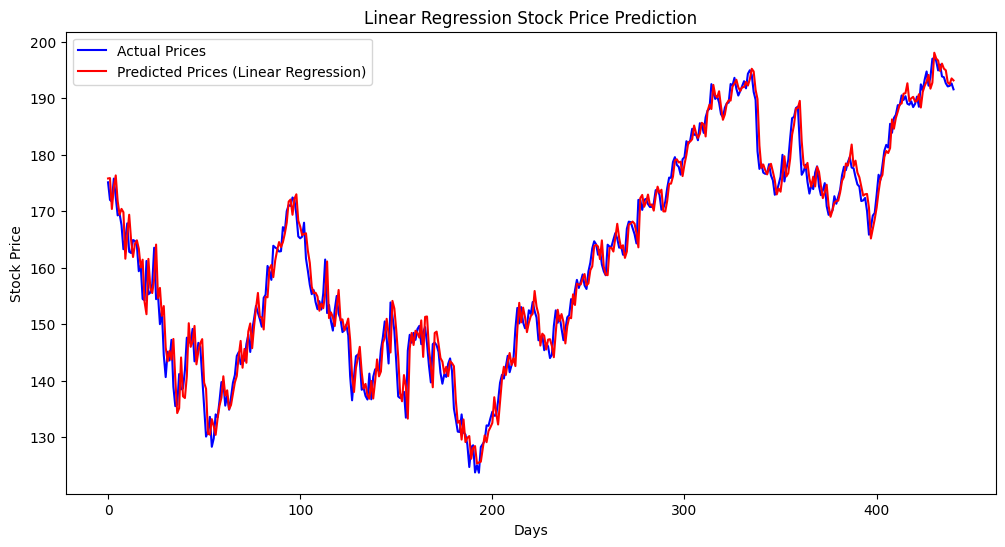

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


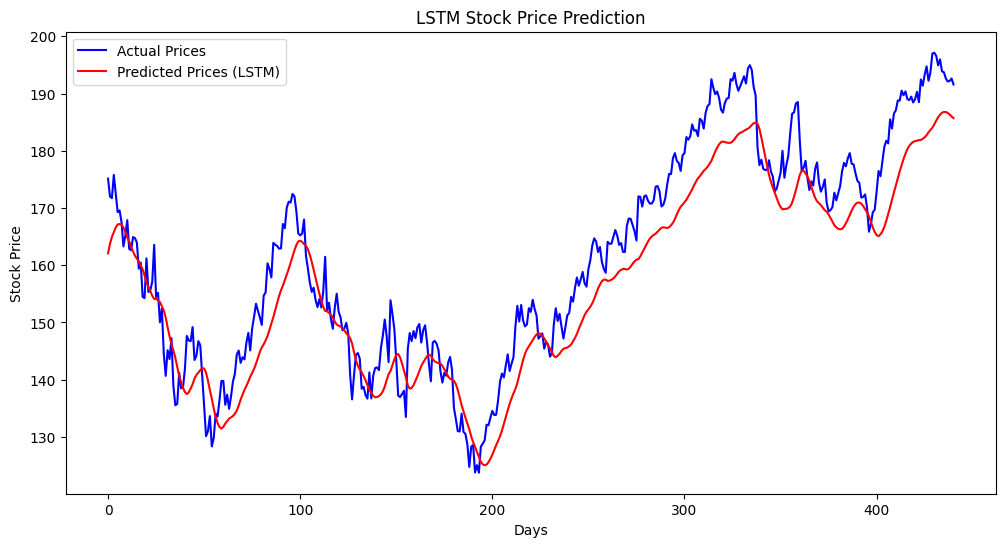

In [16]:
# Predict and visualize results for Linear Regression
predictions_lr = lr_model.predict(X_test)
predictions_lr = scaler.inverse_transform(predictions_lr.reshape(-1, 1))

actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Actual Prices", color="blue")
plt.plot(predictions_lr, label="Predicted Prices (Linear Regression)", color="red")
plt.title("Linear Regression Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Predict and visualize results for LSTM
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predictions_lstm = lstm_model.predict(X_test_lstm)
predictions_lstm = scaler.inverse_transform(predictions_lstm.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Actual Prices", color="blue")
plt.plot(predictions_lstm, label="Predicted Prices (LSTM)", color="red")
plt.title("LSTM Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()
